In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from pylab import *
import scipy
from scipy.fftpack import fft,fftfreq, fftshift

In [2]:
df=pd.read_csv("ciccese.csv",header=int(0))

In [3]:
from datetime import datetime
df['date']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'anio'],x[u'mes'], x[u'dia'], x[u'hora(utc)']), "%Y %m %d %H"),axis=1)

In [4]:
df.head()

,anio,mes,dia,hora(utc),altura(mm),date
0,2016,1,1,0,253,2016-01-01 00:00:00
1,2016,1,1,1,221,2016-01-01 01:00:00
2,2016,1,1,2,223,2016-01-01 02:00:00
3,2016,1,1,3,265,2016-01-01 03:00:00
4,2016,1,1,4,342,2016-01-01 04:00:00


In [5]:
df.describe()

,anio,mes,dia,hora(utc),altura(mm)
count,1440.0,1440.000000,1440.000000,1440.000000,1440.000000
mean,2016.0,1.483333,15.516667,11.500000,471.790278
std,0.0,0.499896,8.687278,6.924591,292.736442
min,2016.0,1.000000,1.000000,0.000000,-274.000000
25%,2016.0,1.000000,8.000000,5.750000,294.500000
50%,2016.0,1.000000,15.500000,11.500000,484.500000
75%,2016.0,2.000000,23.000000,17.250000,678.000000
max,2016.0,2.000000,31.000000,23.000000,1214.000000


In [6]:
df.apply(lambda x: sum(x.isnull()), axis=0)

anio          0
mes           0
dia           0
hora(utc)     0
altura(mm)    0
date          0
dtype: int64

In [7]:
df.columns

Index(['anio', 'mes', 'dia', 'hora(utc)', 'altura(mm)', 'date'], dtype='object')

In [8]:
df.columns=['anio','mes','dia','hora(utc)','altura(mm)','date']

In [9]:
df.tail()

,anio,mes,dia,hora(utc),altura(mm),date
1435,2016,2,29,19,414,2016-02-29 19:00:00
1436,2016,2,29,20,383,2016-02-29 20:00:00
1437,2016,2,29,21,339,2016-02-29 21:00:00
1438,2016,2,29,22,305,2016-02-29 22:00:00
1439,2016,2,29,23,291,2016-02-29 23:00:00


In [10]:
df.describe()

,anio,mes,dia,hora(utc),altura(mm)
count,1440.0,1440.000000,1440.000000,1440.000000,1440.000000
mean,2016.0,1.483333,15.516667,11.500000,471.790278
std,0.0,0.499896,8.687278,6.924591,292.736442
min,2016.0,1.000000,1.000000,0.000000,-274.000000
25%,2016.0,1.000000,8.000000,5.750000,294.500000
50%,2016.0,1.000000,15.500000,11.500000,484.500000
75%,2016.0,2.000000,23.000000,17.250000,678.000000
max,2016.0,2.000000,31.000000,23.000000,1214.000000


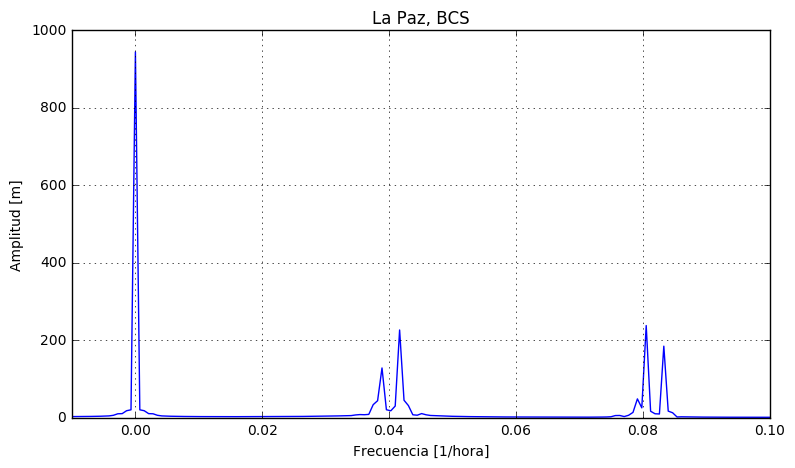

In [14]:
N_d = 1440
T = 1.0
#aplicacion de la transformada de Fourier
y = df["altura(mm)"] 
yf = fft(y)
xf = fftfreq(N_d, T)
xf = fftshift(xf)
yplot = fftshift(yf)

graf = plt.plot(xf, 2.0/N_d *abs(yplot))
plt.xlim(-0.01,0.1)
plt.grid(True)

plt.xlabel('Frecuencia [1/hora]')
plt.ylabel('Amplitud [m]')
plt.title('La Paz, BCS')

fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.show()

In [15]:
a= yf.real[0:30,]/1440 

In [16]:
a[a[:,] > 10]

array([ 471.79027778])

In [17]:
yf/1440

array([ 471.79027778+0.j        ,    1.12985391-9.8608946j ,
         -3.45653695-8.04288996j, ...,    1.06579576+4.88561728j,
         -3.45653695+8.04288996j,    1.12985391+9.8608946j ])

In [18]:
b= np.absolute(yf/1440)

In [19]:
b[b[:,] > 10]

array([ 471.79027778,   16.55341867,   21.66066513,   63.91865375,
         10.03781637,   14.76887262,  112.93183969,   22.27997147,
         15.35317457,   24.01832666,   12.4444684 ,  118.63969173,
         92.03258859,   92.03258859,  118.63969173,   12.4444684 ,
         24.01832666,   15.35317457,   22.27997147,  112.93183969,
         14.76887262,   10.03781637,   63.91865375,   21.66066513,
         16.55341867])

In [20]:
print(np.where(b[:,]>10))
c= b[b[:,]>10]
c

(array([   0,   54,   55,   56,   57,   59,   60,   61,   62,  114,  115,
        116,  120, 1320, 1324, 1325, 1326, 1378, 1379, 1380, 1381, 1383,
       1384, 1385, 1386]),)


array([ 471.79027778,   16.55341867,   21.66066513,   63.91865375,
         10.03781637,   14.76887262,  112.93183969,   22.27997147,
         15.35317457,   24.01832666,   12.4444684 ,  118.63969173,
         92.03258859,   92.03258859,  118.63969173,   12.4444684 ,
         24.01832666,   15.35317457,   22.27997147,  112.93183969,
         14.76887262,   10.03781637,   63.91865375,   21.66066513,
         16.55341867])

In [21]:
print()
print('Tercer Armónico notorio')
print('Amplitud=',np.absolute(yf[56,]/1440))
print('frecuencia=', xf[int(720 +56),])
print('periodo=', 1/xf[int(720 +56),])

print()
print('Cuarto armónico notorio')
print('Amplitud=',np.absolute(yf[57,]/1440))
print('frecuencia=', xf[int(720 +57),])
print('periodo=', 1/xf[int(720 +57),])

print()
print('Quinto armónico notorio')
print('Amplitud=',np.absolute(yf[59,]/1440))
print('frecuencia=', xf[int(720 +59),])
print('periodo=', 1/xf[int(720 +59),])

print()
print('Sexto armónico notorio')
print('Amplitud=',np.absolute(yf[60,]/1440))
print('frecuencia=', xf[int(720 +60),])
print('periodo=', 1/xf[int(720 +60),])

print()
print('Séptimo armónico notorio')
print('Amplitud=',np.absolute(yf[61,]/1440))
print('frecuencia=', xf[int(720 +61),])
print('periodo=', 1/xf[int(720 +61),])

print()
print('Octavo armónico notorio')
print('Amplitud=',np.absolute(yf[114,]/1440))
print('frecuencia=', xf[int(720 +114),])
print('periodo=', 1/xf[int(720 +114),])

print()
print('Noveno armónico notorio')
print('Amplitud=',np.absolute(yf[116,]/1440))
print('frecuencia=', xf[int(720 +116),])
print('periodo=', 1/xf[int(720 +116),])

print()
print('Décimo armónico notorio')
print('Amplitud=',np.absolute(yf[120,]/1440))
print('frecuencia=', xf[int(720 +120),])
print('periodo=', 1/xf[int(720 +120),])


Tercer Armónico notorio
Amplitud= 63.9186537542
frecuencia= 0.0388888888889
periodo= 25.7142857143

Cuarto armónico notorio
Amplitud= 10.0378163695
frecuencia= 0.0395833333333
periodo= 25.2631578947

Quinto armónico notorio
Amplitud= 14.7688726244
frecuencia= 0.0409722222222
periodo= 24.406779661

Sexto armónico notorio
Amplitud= 112.931839688
frecuencia= 0.0416666666667
periodo= 24.0

Séptimo armónico notorio
Amplitud= 22.2799714702
frecuencia= 0.0423611111111
periodo= 23.606557377

Octavo armónico notorio
Amplitud= 24.0183266613
frecuencia= 0.0791666666667
periodo= 12.6315789474

Noveno armónico notorio
Amplitud= 118.639691727
frecuencia= 0.0805555555556
periodo= 12.4137931034

Décimo armónico notorio
Amplitud= 92.0325885854
frecuencia= 0.0833333333333
periodo= 12.0


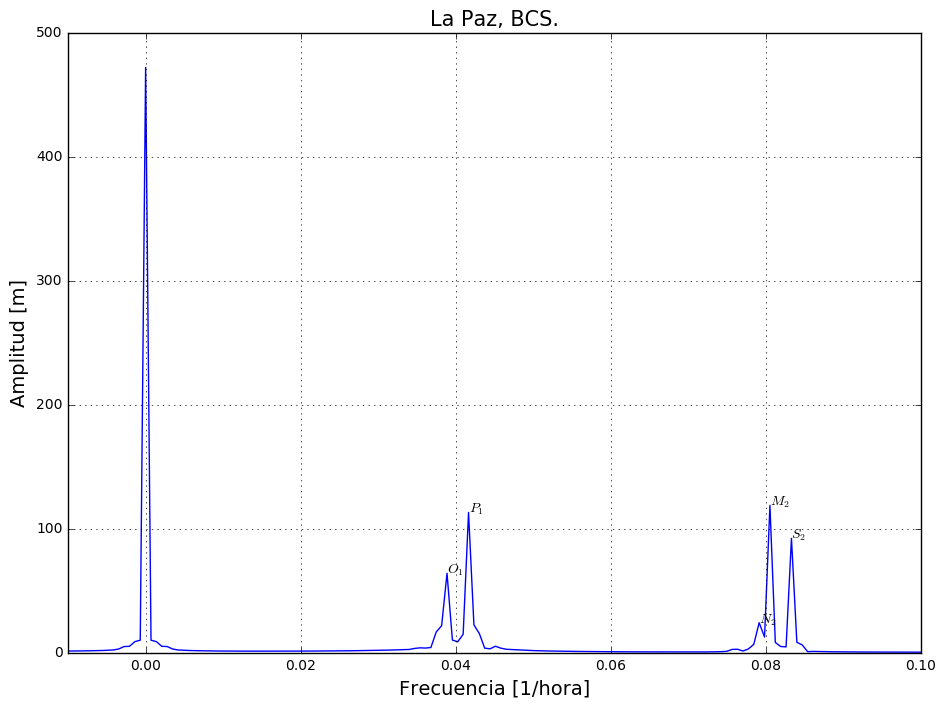

In [22]:
fig = plt.gcf()
fig.set_size_inches(11, 8)


graf = plt.plot(xf, 1.0/1440 *abs(yplot))
plt.xlim(-0.01,0.1)
plt.grid(True)

plt.xlabel('Frecuencia [1/hora]', fontsize=14)
plt.ylabel('Amplitud [m]', fontsize=14)
plt.title('La Paz, BCS.', fontsize=15)

plt.text(0.0388888888889, 63.9186537542, '$O_1$')
plt.text(0.0416666666667, 112.931839688, '$P_1$')
plt.text(0.0791666666667, 24.0183266613, '$N_2$')
plt.text(0.0805555555556, 118.639691727, '$M_2$')
plt.text(0.0833333333333, 92.0325885854, '$S_2$')

plt.show()